In [1]:
#imstall missingno
!pip install missingno

# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [21]:
df = pd.read_csv('C:/Users/CLINTON/Documents/My documents/LLM/Informatics/Neural Networks/vehicles.csv')
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [22]:
emission = pd.read_csv('C:/Users/CLINTON/Documents/My documents/LLM/Informatics/Neural Networks/emissions.csv')
emission.head()

,efid,id,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,4HNXV03.2MJE,19332,3,1.0,-1.0,-1,B9,BIN 9
1,4HNXV03.2MJE,19332,7,1.0,-1.0,-1,L1,LEV
2,4HNXV03.2MJE,19333,3,1.0,-1.0,-1,B9,BIN 9
3,4HNXV03.2MJE,19333,7,1.0,-1.0,-1,L1,LEV
4,4ADXV01.8346,19334,3,1.0,-1.0,-1,B9,BIN 9


# Data Preparation

In [23]:
emission.shape

(47527, 8)

In [24]:
df.shape

(45992, 83)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45992 entries, 0 to 45991
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        45992 non-null  float64
 1   barrelsA08       45992 non-null  float64
 2   charge120        45992 non-null  float64
 3   charge240        45992 non-null  float64
 4   city08           45992 non-null  int64  
 5   city08U          45992 non-null  float64
 6   cityA08          45992 non-null  int64  
 7   cityA08U         45992 non-null  float64
 8   cityCD           45992 non-null  float64
 9   cityE            45992 non-null  float64
 10  cityUF           45992 non-null  float64
 11  co2              45992 non-null  int64  
 12  co2A             45992 non-null  int64  
 13  co2TailpipeAGpm  45992 non-null  float64
 14  co2TailpipeGpm   45992 non-null  float64
 15  comb08           45992 non-null  int64  
 16  comb08U          45992 non-null  float64
 17  combA08     

In [26]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47527 entries, 0 to 47526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   efid           47527 non-null  object 
 1   id             47527 non-null  int64  
 2   salesArea      47527 non-null  int64  
 3   score          47527 non-null  float64
 4   scoreAlt       47527 non-null  float64
 5   smartwayScore  47527 non-null  int64  
 6   standard       47527 non-null  object 
 7   stdText        47513 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.9+ MB


In [27]:
# merging emission with vehicle file using the column they have in common, id
data = df.merge(emission, on=['id'])
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,phevCity,phevHwy,phevComb,efid,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
1,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
2,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
3,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
4,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0,0,0,4ADXV01.8346,3,1.0,-1.0,-1,B9,BIN 9


In [28]:
data.shape

(47393, 90)

In [29]:
# checking for duplicates
data.duplicated().value_counts()

False    47393
dtype: int64

**Missing value treatment**

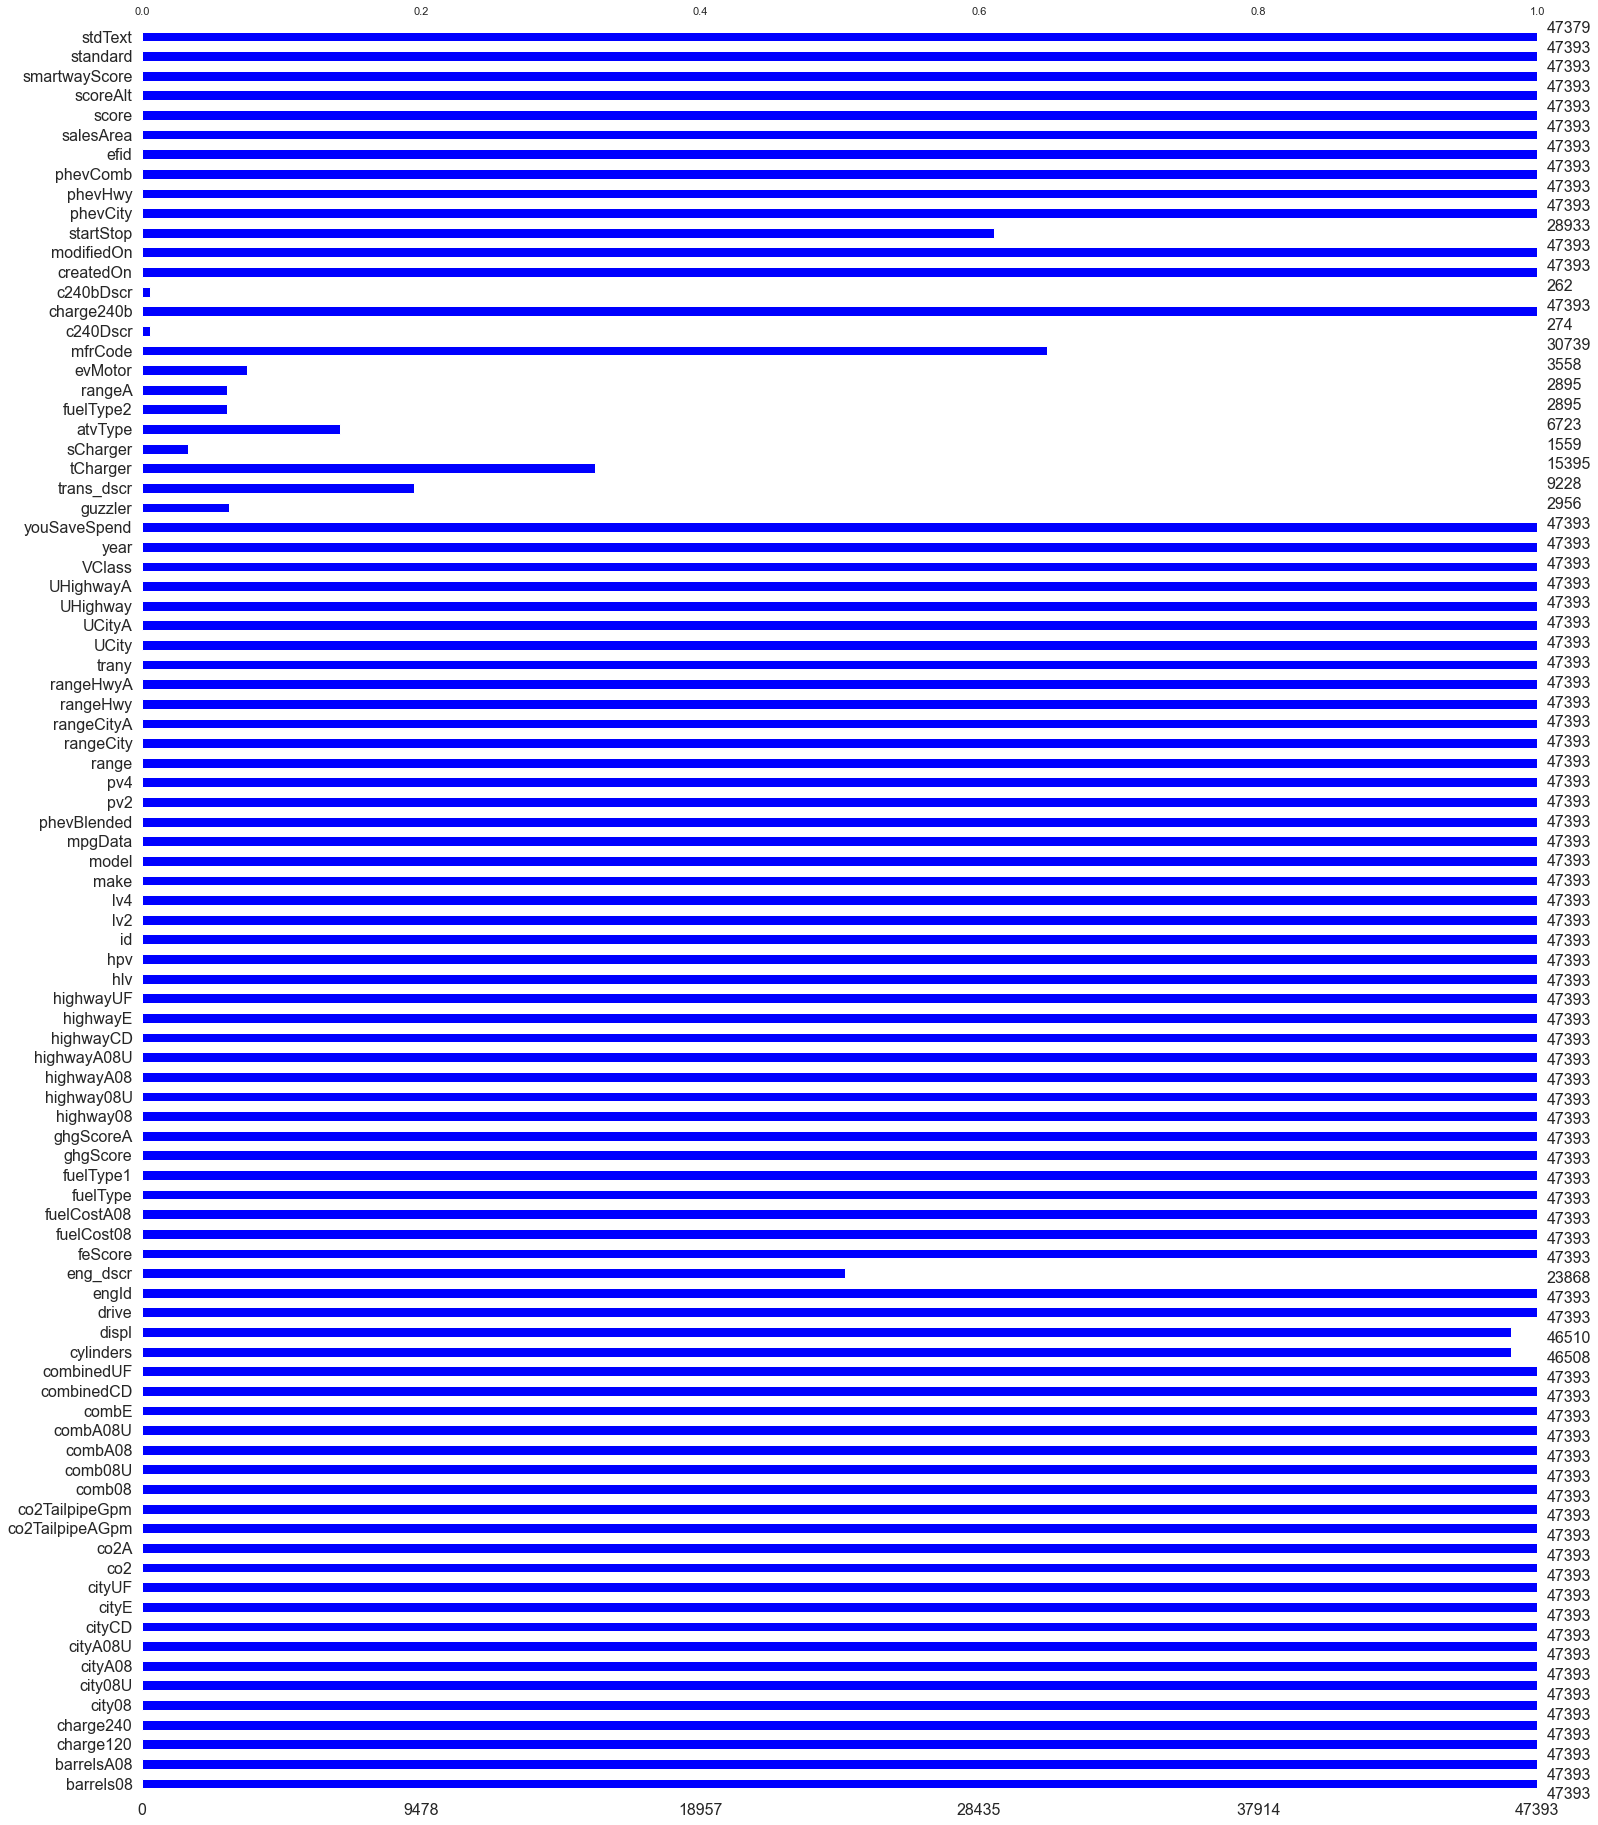

In [30]:
# Visualize the missing values using msno bar
sns.set(style = 'ticks')
msno.bar(data, color = "blue")
# This plot helps us to visualize the amount of missing data in every attributes for the train data set

In [31]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [32]:
missing_zero_values_table(data)

Your selected dataframe has 90 columns and 47393 Rows.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
c240bDscr,0,47131,99.4,47131,99.4,object
c240Dscr,0,47119,99.4,47119,99.4,object
sCharger,0,45834,96.7,45834,96.7,object
fuelType2,0,44498,93.9,44498,93.9,object
rangeA,0,44498,93.9,44498,93.9,object
guzzler,0,44437,93.8,44437,93.8,object
evMotor,0,43835,92.5,43835,92.5,object
atvType,0,40670,85.8,40670,85.8,object
trans_dscr,0,38165,80.5,38165,80.5,object
tCharger,0,31998,67.5,31998,67.5,object


In [33]:
# Dropping columns with more than 20% missing values 
missing_data = data.isnull().sum()/len(data)
data = data.drop(columns=missing_data[missing_data>0.2].index)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,phevCity,phevHwy,phevComb,efid,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
1,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
2,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
3,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
4,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0,0,0,4ADXV01.8346,3,1.0,-1.0,-1,B9,BIN 9


In [34]:
data.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08',
       'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
       'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'charge240b',
       'createdOn', 'modifiedOn', 'phevCity', 'phevHwy', 'phevComb', 'efid',
       'salesArea', 'score', 'scoreAlt', 'smartwayScore', 'standard',
       'stdText'],
      dtype='object')

**Feature Selection**

**Target and Predictor variables explanation:** 

 
cylinders - engine cylinders

displ - engine displacement in liters

drive - drive axle type

engId - EPA model type index

feScore - EPA Fuel Economy Score

fuelCost08 - annual fuel cost

fuelType - fuel type with fuelType1 and fuelType2 (if applicable)

trany - transmission

VClass - EPA vehicle size class

make - manufacturer

model - model name

This project involves prediction of fuel economy and emission, and from the documentation of this data set (https://www.fueleconomy.gov/feg/ws/index.shtml#fuelType1), there are two fuel types for each prediction, fuel type1 and fuel type2, however fuel type2 was dropped because it has over 93% missing values. So I'll be working with features related with fuel type 1 and I woulde be using the fuel type input variale because it is a combination of both fuel type one and two.
There are two co2 as target features, co2 and co2TailpipeGpm, from the documentation, they have same meaning but they actually have different data inputs, so I would view them individually and use just one.

In [35]:
data['co2TailpipeGpm'].value_counts()

423.190476    2011
444.350000    1902
467.736842    1770
493.722222    1611
403.954545    1517
              ... 
391.538462       1
987.444444       1
130.000000       1
565.555556       1
682.000000       1
Name: co2TailpipeGpm, Length: 657, dtype: int64

In [36]:
data['co2'].value_counts()

-1      18849
 0        885
 407      187
 415      180
 387      178
        ...  
 782        2
 689        2
 682        1
 707        1
 130        1
Name: co2, Length: 602, dtype: int64

It can be seen that co2 has -1 data inputs. 

The amount of carbon dioxide that is emitted into the atmosphere by a vehicle's combustion of fossil fuels is measured by its CO2 emissions, which technically cannot be negative.

However, a vehicle could have "negative emissions" in the sense that it uses carbon capture and storage (CCS) technology to lower the quantity of CO2 in the atmosphere.

There aren't any vehicles on the market right now that use carbon capture and storage (CCS) technology to achieve negative emissions.

There for I will not be using this particular co2 feature in this project, I'd use the co2tailpipe as my target co2.

In [37]:
targets = data[['feScore','co2TailpipeGpm']]
targets

,feScore,co2TailpipeGpm
0,-1,493.722222
1,-1,493.722222
2,-1,493.722222
3,-1,493.722222
4,-1,423.190476
...,...,...
47388,9,0.000000
47389,9,0.000000
47390,9,0.000000
47391,9,0.000000


# FOCUSING ON TARGET fuelCost08

In [38]:
# selecting relevant features from the whole dataset
new_data = data[['cylinders','displ', 'drive', 'efid', 'engId', 'feScore', 
        'make', 'model', 'trany', 'VClass', 'year','fuelType']]

In [39]:
new_data.head()

,cylinders,displ,drive,efid,engId,feScore,make,model,trany,VClass,year,fuelType
0,6.0,3.0,Rear-Wheel Drive,4HNXV03.2MJE,0,-1,Acura,NSX,Automatic (S4),Two Seaters,2004,Premium
1,6.0,3.0,Rear-Wheel Drive,4HNXV03.2MJE,0,-1,Acura,NSX,Automatic (S4),Two Seaters,2004,Premium
2,6.0,3.2,Rear-Wheel Drive,4HNXV03.2MJE,0,-1,Acura,NSX,Manual 6-spd,Two Seaters,2004,Premium
3,6.0,3.2,Rear-Wheel Drive,4HNXV03.2MJE,0,-1,Acura,NSX,Manual 6-spd,Two Seaters,2004,Premium
4,4.0,1.8,Front-Wheel Drive,4ADXV01.8346,0,-1,Audi,TT Roadster,Automatic (S6),Two Seaters,2004,Premium


In [40]:
#checking for missing values after feature selection
new_data.isnull().sum()


cylinders    885
displ        883
drive          0
efid           0
engId          0
feScore        0
make           0
model          0
trany          0
VClass         0
year           0
fuelType       0
dtype: int64

**Treating missing values after feature selection**

In [41]:
# replacing missing values in 'displ' column with the mean ( choosing the mean because its inputs are decimals and given 
#that the mean is likely to give a decimal number, it'll fit into the column data)

mean_displ = new_data['displ'].mean()
new_data['displ'].replace(np.nan, mean_displ, inplace = True)

In [42]:
# replacing missing values in 'cylinders' column with the median ( choosing the median because its inputs are intergers and 
#given that the mean is likely to give a decimal number, it wont fit into the column data)

med_cyl = new_data['cylinders'].median()
new_data['cylinders'].replace(np.nan, med_cyl, inplace = True)

In [43]:
#checking for missing values after treatment
new_data.isnull().sum()


cylinders    0
displ        0
drive        0
efid         0
engId        0
feScore      0
make         0
model        0
trany        0
VClass       0
year         0
fuelType     0
dtype: int64

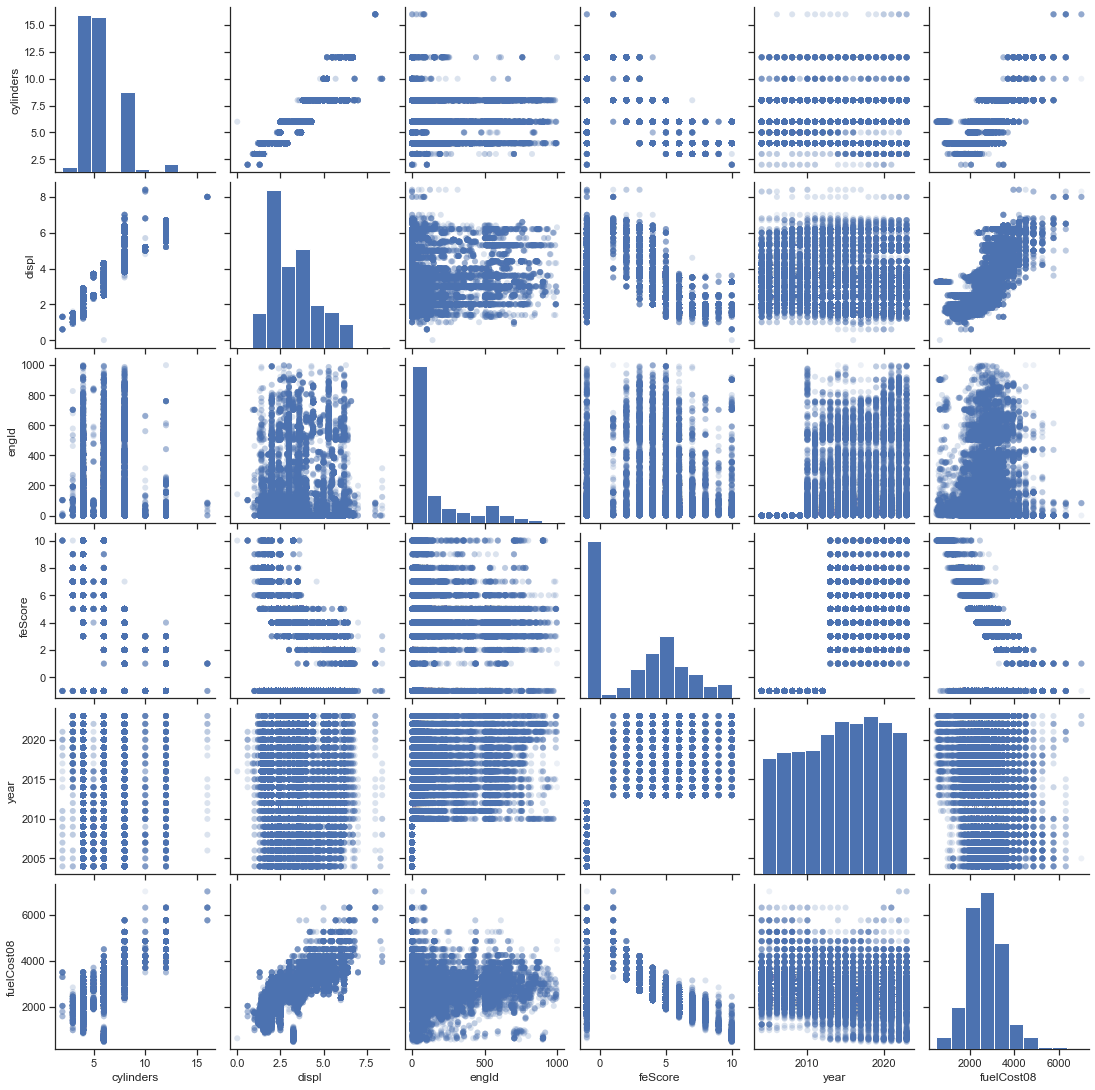

In [36]:
# Create a matrix scatterplot 
sns.pairplot(new_data, plot_kws = dict(alpha=.1, edgecolor = 'none')) 

# Exploratory Data Analysis

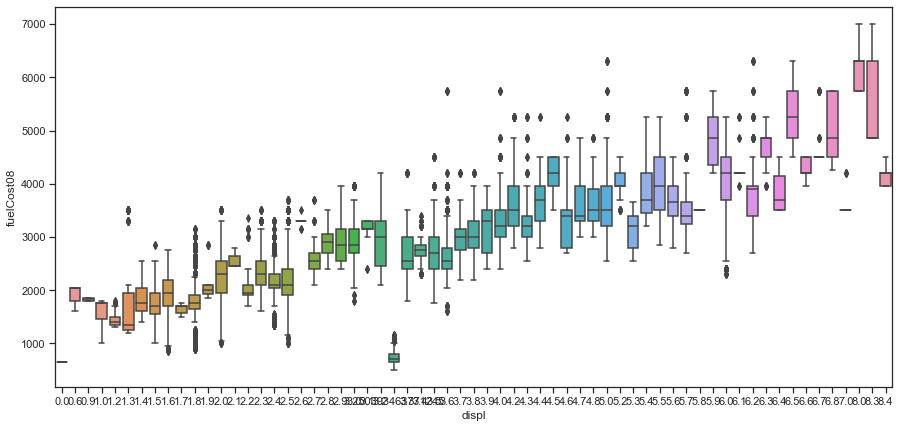

In [37]:
#creating boxplot to get more details on outliers
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['displ'], y =new_data['fuelCost08'])

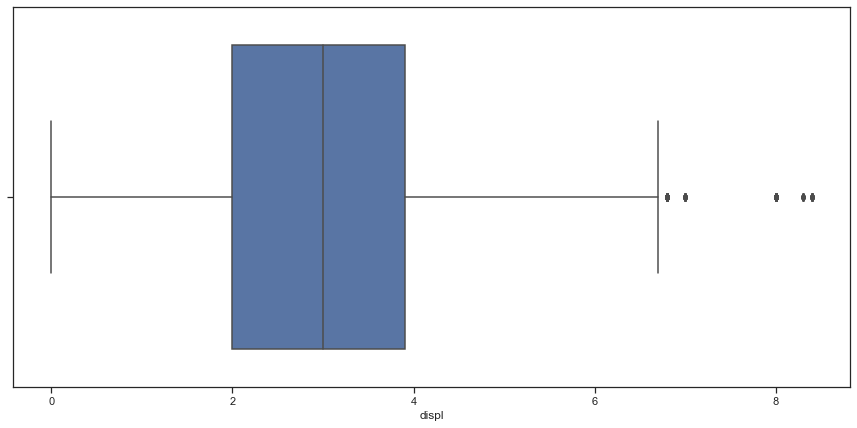

In [38]:
#creating boxplot to get more details on outliers
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['displ'])

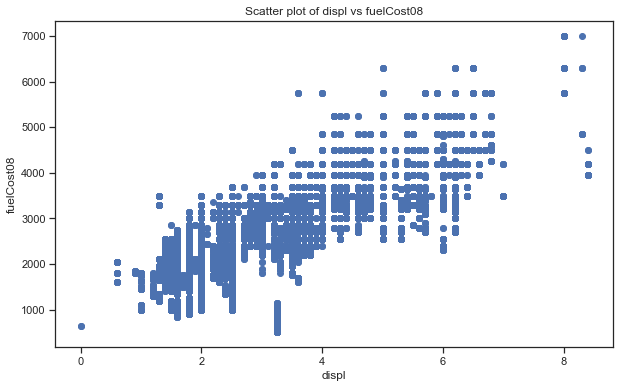

In [39]:
#using scatter plot (crossplot) to visualize better
plt.figure(figsize=(10, 6))
plt.scatter(x=new_data['displ'], y=new_data['fuelCost08'])
plt.title('Scatter plot of displ vs fuelCost08')
plt.xlabel('displ')
plt.ylabel('fuelCost08')
plt.show()


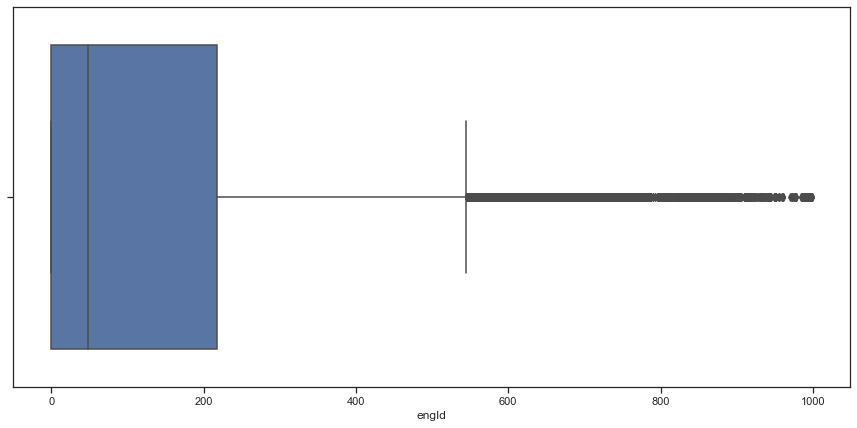

In [40]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['engId'])

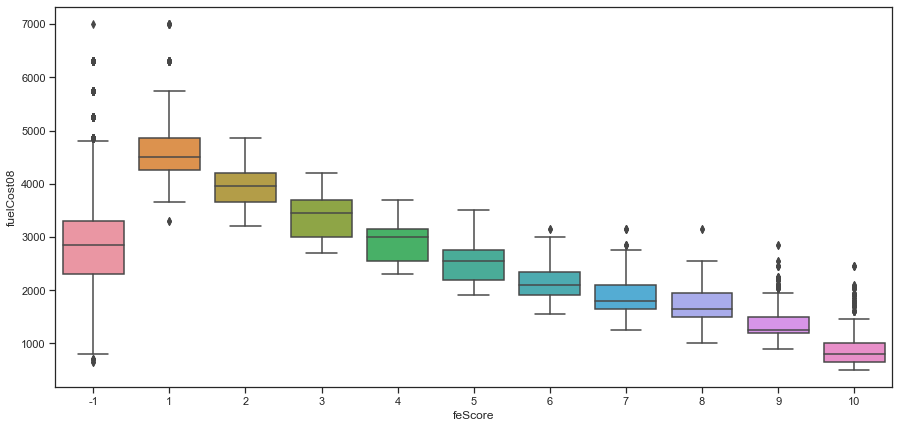

In [41]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['feScore'], y =new_data['fuelCost08'])

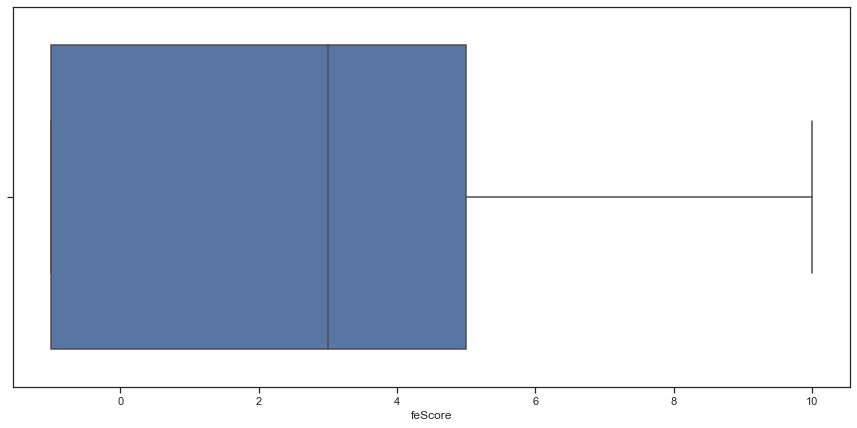

In [42]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['feScore'])

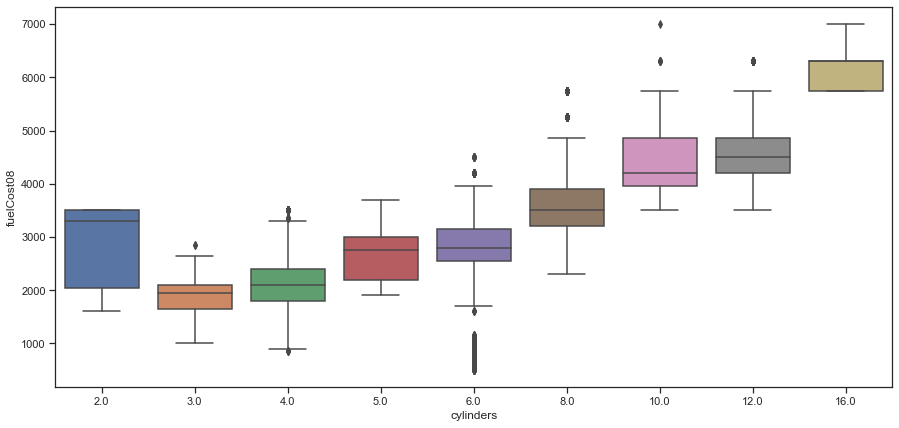

In [43]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'], y =new_data['fuelCost08'])

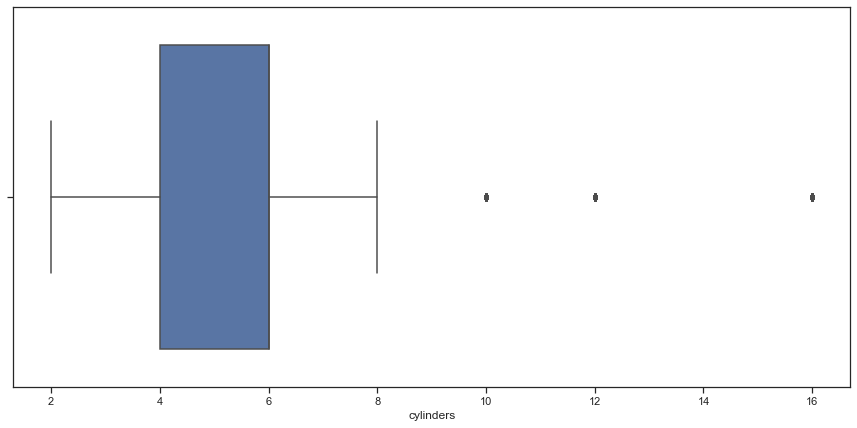

In [44]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'])

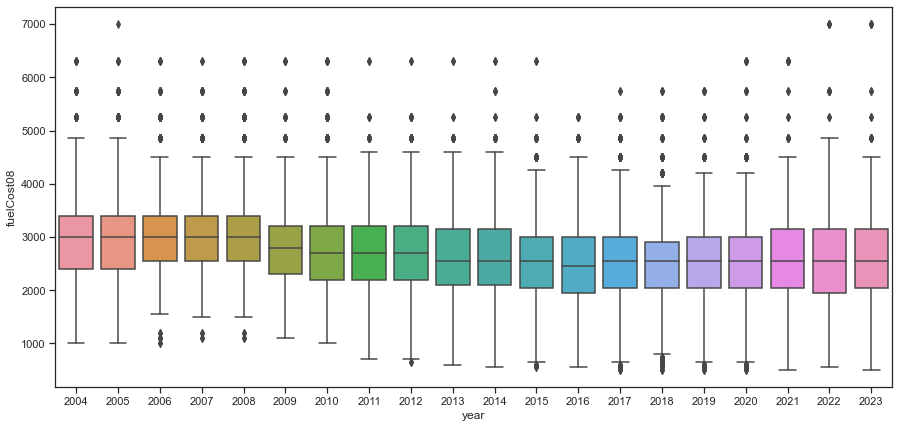

In [45]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['year'], y =new_data['fuelCost08'])

In [44]:
#Removal of outliers
new_data_clean = new_data [(new_data['feScore'] >=1) &
                            (new_data['cylinders']< 12) &
                            (new_data['displ'] < 7)].copy()

feScore is the EPA Fuel Economy Score (-1 = Not available) so I dropped it the -1 rows

In [45]:
new_data_clean.describe()

,cylinders,displ,engId,feScore,year
count,27852.000000,27852.000000,27852.000000,27852.000000,27852.000000
mean,5.458710,3.058469,230.125916,5.185301,2017.960649
std,1.567523,1.245731,241.872210,1.896127,3.117364
min,2.000000,0.000000,1.000000,1.000000,2013.000000
25%,4.000000,2.000000,38.000000,4.000000,2015.000000
50%,6.000000,3.000000,115.000000,5.000000,2018.000000
75%,6.000000,3.600000,402.000000,6.000000,2021.000000
max,10.000000,6.800000,999.000000,10.000000,2023.000000


In [46]:
new_data_clean.isnull().sum()

cylinders    0
displ        0
drive        0
efid         0
engId        0
feScore      0
make         0
model        0
trany        0
VClass       0
year         0
fuelType     0
dtype: int64

**Categorical and numerical variables**

In [47]:
numerical_features = new_data_clean._get_numeric_data().columns 
categorical_features = new_data_clean.columns.difference(numerical_features)

In [48]:
categorical_features

Index(['VClass', 'drive', 'efid', 'fuelType', 'make', 'model', 'trany'], dtype='object')

In [49]:
#just checking the classes of vehicles
new_data_clean['VClass'].value_counts()

Midsize Cars                          4397
Compact Cars                          3598
Small Sport Utility Vehicle 4WD       3141
Subcompact Cars                       2530
Standard Sport Utility Vehicle 4WD    2418
Large Cars                            2273
Small Sport Utility Vehicle 2WD       1848
Two Seaters                           1557
Minicompact Cars                      1078
Standard Pickup Trucks 4WD            1042
Standard Sport Utility Vehicle 2WD     862
Small Station Wagons                   846
Standard Pickup Trucks 2WD             735
Special Purpose Vehicle 2WD            336
Small Pickup Trucks 2WD                247
Small Pickup Trucks 4WD                245
Minivan - 2WD                          200
Midsize Station Wagons                 167
Vans, Passenger Type                   138
Vans, Cargo Type                        82
Special Purpose Vehicle 4WD             82
Minivan - 4WD                           30
Name: VClass, dtype: int64

In [50]:
desired_fuel = ["Regular", "Premium", "Gasoline or E85", "Diesel", "Midgrade", "Premium or E85", "CNG", "Gasoline or natural gas"]

In [51]:
subset_df = new_data_clean[new_data_clean["fuelType"].isin(desired_fuel)]

In [52]:
subset_df.head()

,cylinders,displ,drive,efid,engId,feScore,make,model,trany,VClass,year,fuelType
18824,6.0,3.8,All-Wheel Drive,DNSXV03.8GBA,71,4,Nissan,GT-R,Automatic (AM6),Subcompact Cars,2013,Premium
18825,6.0,3.8,All-Wheel Drive,DNSXV03.8GBA,71,4,Nissan,GT-R,Automatic (AM6),Subcompact Cars,2013,Premium
18826,4.0,2.0,Front-Wheel Drive,DVWXV02.03PA,1,6,Volkswagen,CC,Automatic (AM-S6),Compact Cars,2013,Premium
18827,4.0,2.0,Front-Wheel Drive,DVWXV02.03PA,1,6,Volkswagen,CC,Automatic (AM-S6),Compact Cars,2013,Premium
18828,6.0,3.6,Front-Wheel Drive,DVWXV03.6U46,2,5,Volkswagen,CC,Automatic (S6),Compact Cars,2013,Premium


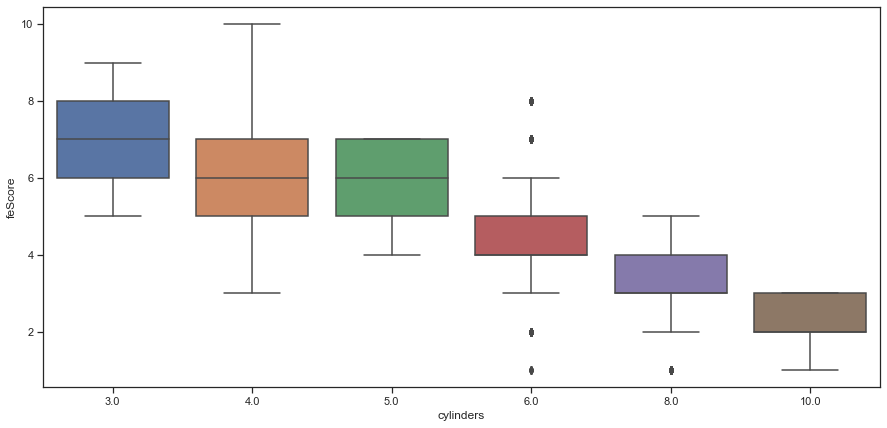

In [55]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =subset_df['cylinders'], y =subset_df['feScore'])

Text(0, 0.5, 'FeScore')

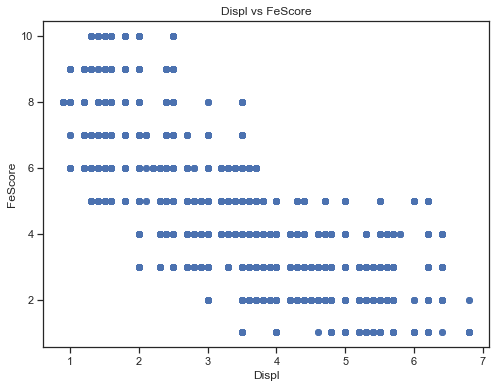

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(subset_df["displ"], subset_df["feScore"])

# Set the plot title and axis labels
plt.title("Displ vs FeScore")
plt.xlabel("Displ")
plt.ylabel("FeScore")

In [57]:
#By fuel_type
FE_by_fuel = subset_df.groupby('fuelType')['feScore'].mean().reset_index().sort_values(by= 'feScore', ascending = False)
FE_by_fuel

,fuelType,feScore
0,CNG,6.250000
1,Diesel,5.991349
7,Regular,5.464466
6,Premium or E85,5.103896
3,Gasoline or natural gas,5.000000
5,Premium,4.566573
2,Gasoline or E85,3.797619
4,Midgrade,3.336770


Text(0.5, 1.0, 'feScore by FuelType')

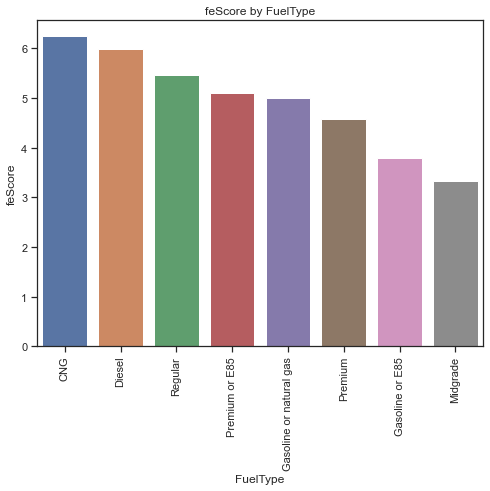

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x = FE_by_fuel['fuelType'], y = FE_by_fuel['feScore'])

plt.xlabel('FuelType')
plt.ylabel("feScore")
plt.xticks(rotation=90)
plt.title("feScore by FuelType")

In [59]:
FE_by_make = subset_df.groupby('make')['feScore'].mean().reset_index().sort_values(by= 'feScore', ascending = False)
most_econmic_make = FE_by_make.head(20)
most_econmic_make

,make,feScore
46,smart,8.333333
39,Scion,6.909091
16,Honda,6.780182
12,Fiat,6.573529
29,Mazda,6.434524
27,MINI,6.411625
17,Hyundai,6.258938
41,Suzuki,6.187500
32,Mitsubishi,6.104046
44,Volkswagen,6.097812


Text(0.5, 1.0, 'Economy by Make')

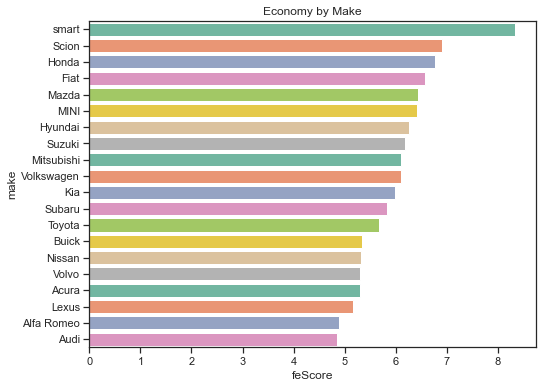

In [60]:
palette = "Set2"

plt.figure(figsize=(8,6))
sns.barplot(y = most_econmic_make['make'], x = most_econmic_make['feScore'],palette=palette, orient = 'h')

plt.xlabel('feScore')
plt.ylabel("make")
plt.title("Economy by Make")

In [224]:
least_eco_make = FE_by_make.tail(20)
least_eco_make

,make,feScore
25,Lincoln,4.443902
26,Lotus,4.388889
31,Mercedes-Benz,4.387883
7,Cadillac,4.339422
35,Porsche,4.291083
10,Dodge,4.187602
15,Genesis,4.074468
37,Ram,3.892734
23,Land Rover,3.803526
14,GMC,3.530558


Text(0.5, 1.0, 'Economy by Vehicle Class')

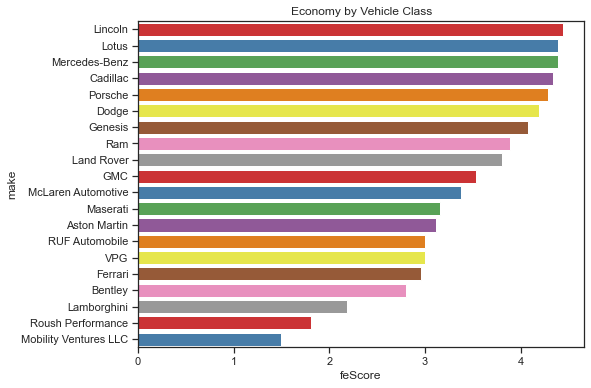

In [225]:
palette = "Set1"

plt.figure(figsize=(8,6))
sns.barplot(y = least_eco_make['make'], x = least_eco_make['feScore'],palette=palette, orient = 'h')

plt.xlabel('feScore')
plt.ylabel("make")
plt.title("Economy by Vehicle Class")

In [92]:
FE_by_car = subset_df.groupby(['make','model', 'year'])['feScore'].mean().reset_index().sort_values(by= 'feScore', ascending = False)
most_economic_cars = FE_by_car.head(50)
most_economic_cars

,make,model,year,feScore
4295,Kia,Niro FE,2019,10.0
7764,Toyota,Prius AWD,2019,10.0
3594,Hyundai,Sonata Hybrid Blue,2020,10.0
7782,Toyota,Prius v,2013,10.0
2799,Ford,Fusion Hybrid FWD,2013,10.0
7781,Toyota,Prius c,2019,10.0
7780,Toyota,Prius c,2018,10.0
7779,Toyota,Prius c,2017,10.0
7778,Toyota,Prius c,2016,10.0
7777,Toyota,Prius c,2015,10.0


In [93]:
most_economic_cars["year"] = most_economic_cars["year"].astype(str)
most_economic_cars["car"] = most_economic_cars["make"] + " " + most_economic_cars["model"] + " " + most_economic_cars["year"]
most_economic_cars.drop(["make", "model", "year"], axis =1, inplace =True)

In [94]:

most_economic_cars = most_economic_cars.reindex(columns=["car","feScore"])
most_economic_cars

,car,feScore
4295,Kia Niro FE 2019,10.0
7764,Toyota Prius AWD 2019,10.0
3594,Hyundai Sonata Hybrid Blue 2020,10.0
7782,Toyota Prius v 2013,10.0
2799,Ford Fusion Hybrid FWD 2013,10.0
7781,Toyota Prius c 2019,10.0
7780,Toyota Prius c 2018,10.0
7779,Toyota Prius c 2017,10.0
7778,Toyota Prius c 2016,10.0
7777,Toyota Prius c 2015,10.0


Text(0.5, 1.0, 'Car by Fescore')

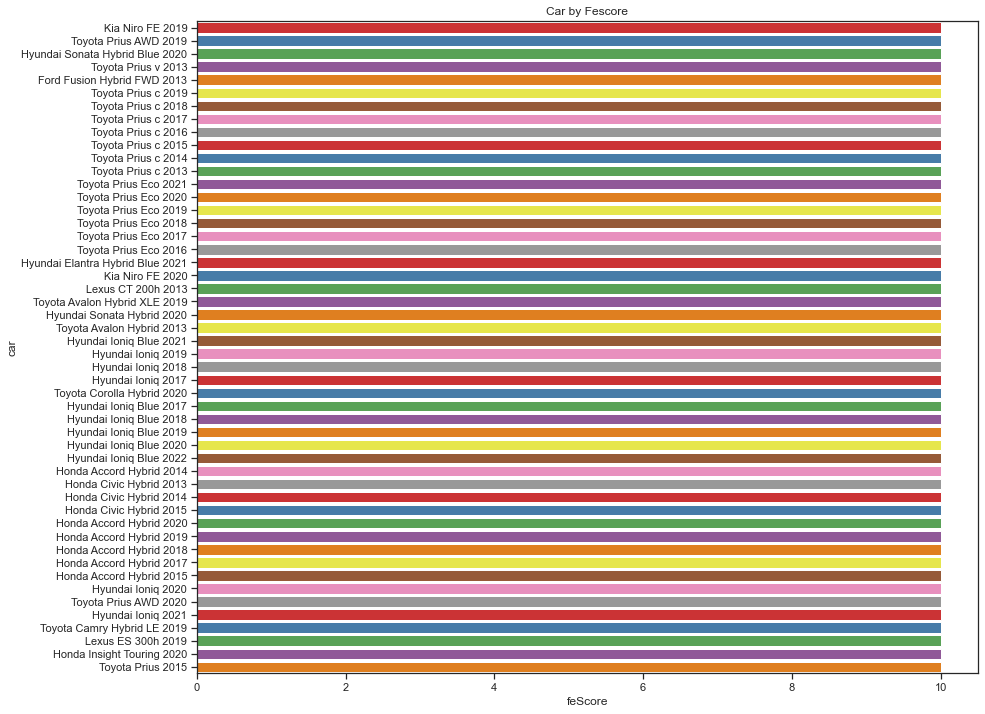

In [97]:
plt.figure(figsize=(14,12))
palette = "Set1"
sns.barplot(x = most_economic_cars['feScore'], y = most_economic_cars['car'],palette=palette, orient = 'h')

plt.xlabel('feScore')
plt.ylabel("car")
plt.title("Car by Fescore")

In [96]:
least_economic_cars  = FE_by_car.tail(50)
least_economic_cars

,make,model,year,feScore
7938,Toyota,Tundra 4WD,2021,1.0
7937,Toyota,Tundra 4WD,2020,1.0
3158,GMC,Yukon XL 2500 2WD,2013,1.0
3159,GMC,Yukon XL 2500 4WD,2013,1.0
7863,Toyota,Sequoia 4WD FFV,2018,1.0
7862,Toyota,Sequoia 4WD FFV,2017,1.0
7855,Toyota,Sequoia 4WD,2021,1.0
7854,Toyota,Sequoia 4WD,2020,1.0
5747,Mercedes-Benz,AMG G63,2020,1.0
5748,Mercedes-Benz,AMG G63,2021,1.0


In [89]:
least_economic_cars["year"] = least_economic_cars["year"].astype(str)
least_economic_cars["car"] = least_economic_cars["make"] + " " + least_economic_cars["model"] + " " + least_economic_cars["year"]
least_economic_cars.drop(["make", "model", "year"], axis =1, inplace =True)
least_economic_cars = least_economic_cars.reindex(columns=["car","feScore"])
least_economic_cars

,car,feScore
7938,Toyota Tundra 4WD 2021,1.0
7937,Toyota Tundra 4WD 2020,1.0
3158,GMC Yukon XL 2500 2WD 2013,1.0
3159,GMC Yukon XL 2500 4WD 2013,1.0
7863,Toyota Sequoia 4WD FFV 2018,1.0
7862,Toyota Sequoia 4WD FFV 2017,1.0
7855,Toyota Sequoia 4WD 2021,1.0
7854,Toyota Sequoia 4WD 2020,1.0
5747,Mercedes-Benz AMG G63 2020,1.0
5748,Mercedes-Benz AMG G63 2021,1.0


Text(0.5, 1.0, 'Economy by car')

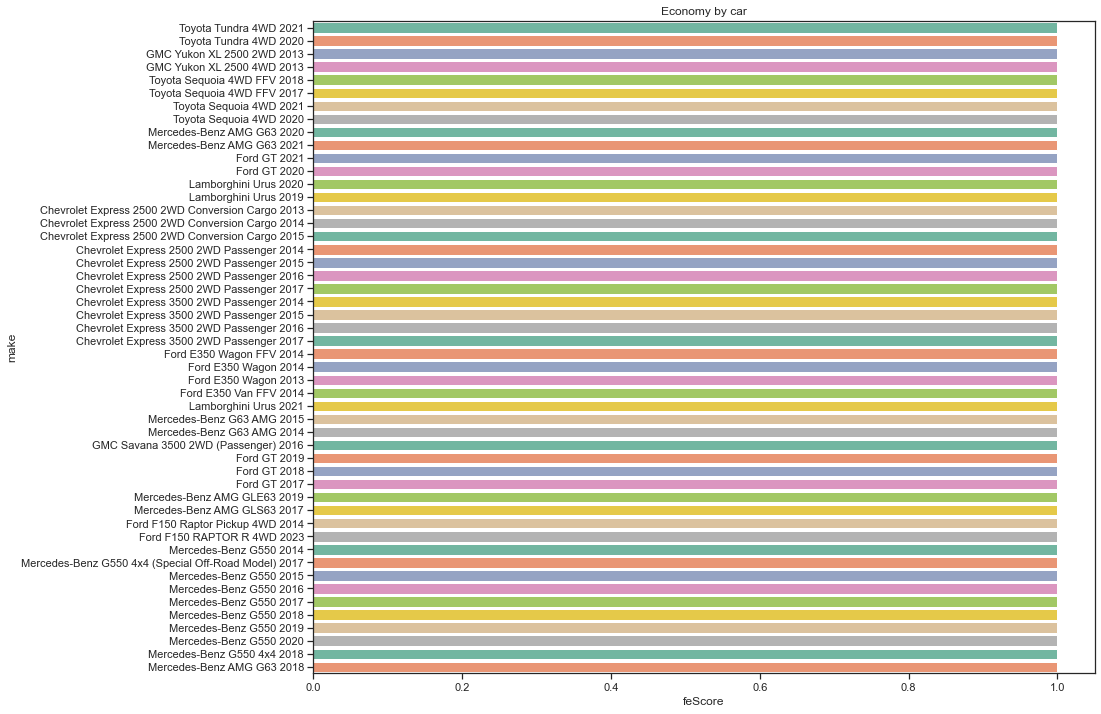

In [90]:
palette = "Set2"

plt.figure(figsize=(14,12))
sns.barplot(y = least_economic_cars['car'], x = least_economic_cars['feScore'],palette=palette, orient = 'h')

plt.xlabel('feScore')
plt.ylabel("make")
plt.title("Economy by car")

In [92]:
#FuelEconomy and Vehicle Class
VClass_economy = subset_df.groupby('VClass')['feScore'].mean().reset_index().sort_values(by= 'feScore', ascending = False)
VClass_economy

,VClass,feScore
11,Small Station Wagons,6.371314
0,Compact Cars,6.161795
2,Midsize Cars,5.879024
9,Small Sport Utility Vehicle 2WD,5.444444
18,Subcompact Cars,5.042500
3,Midsize Station Wagons,5.011976
4,Minicompact Cars,4.998110
10,Small Sport Utility Vehicle 4WD,4.931621
1,Large Cars,4.889666
5,Minivan - 2WD,4.709677


Text(0.5, 1.0, 'Economy by Vehicle Class')

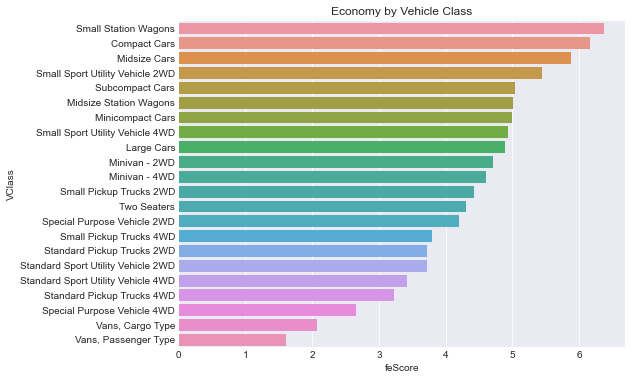

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(y = VClass_economy['VClass'], x = VClass_economy['feScore'], orient = 'h')

plt.xlabel('feScore')
plt.ylabel("VClass")
plt.title("Economy by Vehicle Class")

In [53]:
#Seperating features and target variable
Y = subset_df["feScore"]
X = subset_df.drop(columns='feScore')

# Data Modelling

In [54]:

numerical_features = X._get_numeric_data().columns 
categorical_features = X.columns.difference(numerical_features)
num_features = X[numerical_features]
cat_features = X[categorical_features]

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
    
for col in num_features.columns:
    num_features[col] = ss.fit_transform(num_features[[col]]).squeeze()

In [56]:
#Encoding Categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features = cat_features.astype(str).apply(LabelEncoder().fit_transform)

In [57]:
X = pd.concat([num_features, cat_features], axis = 1)

In [58]:
# Split the data into training and test samples (stratifying by the most important categorical feature)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = X['fuelType'], random_state=42)

### Random Forest

In [59]:
#Fitting with Random Forest
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=1000, n_estimators=500)
rf = rf.fit(X_train, Y_train)

In [60]:
# Compute training R2
training_R2 = rf.score(X_train, Y_train)
training_R2

0.7430419756579656

In [61]:
test_R2 = rf.score(X_test, Y_test)     
test_R2

0.7441695969092732

Text(0.5, 1.0, 'Training R2 = 0.74  Test R2 = 0.74')

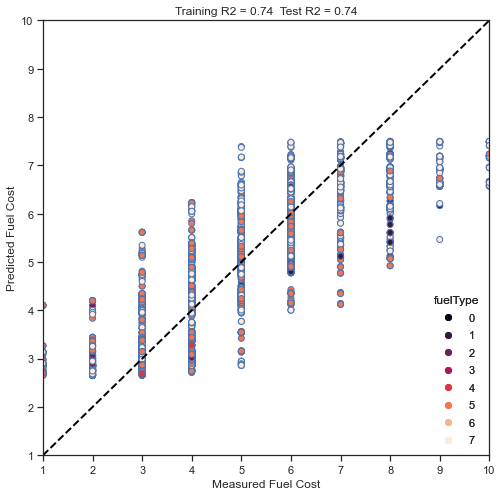

In [63]:
# Making prediction using test data
Y_pred = rf.predict(X_test) 

# Compute test R2
test_R2 = rf.score(X_test, Y_test)   

# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Also create a series of plots for predicted fuel cost versus actual fuel cost 
fig = plt.figure(figsize=(8, 8))
plt.axis([1, 10, 1, 10])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([1, 10],[1, 10], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

In [124]:
from sklearn.model_selection import GridSearchCV

#params = {'n_estimators': [200, 500], 'max_depth': [5, 10]}
params = {'n_estimators': [200, 500], 'max_depth': [5, 10], 'min_samples_split': [200, 1000], 'min_samples_leaf': [500, 1000], 'max_features': [3, 6]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'max_features': [3, 6],
                         'min_samples_leaf': [500, 1000],
                         'min_samples_split': [200, 1000],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [125]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)

In [66]:
rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)

rf.fit(X_train, Y_train) 

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)

In [67]:
test_R2 = rf.score(X_test, Y_test)     
test_R2

0.7439514593442547

## Decision tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

dt.fit(X_train, Y_train) 

DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

In [85]:
training_R2 = dt.score(X_train, Y_train) 

print(training_R2)

Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test) 
print(test_R2)

0.7919365014193201
0.7863024488466611


Text(0.5, 1.0, 'Training R2 = 0.79  Test R2 = 0.79')

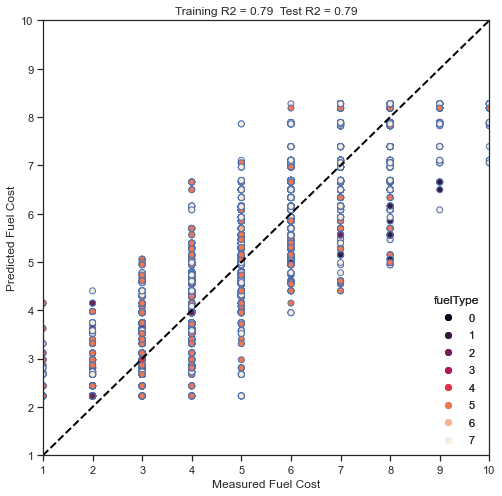

In [86]:
# Making prediction using test data
Y_pred = dt.predict(X_test) 

# Compute test R2
test_R2 = dt.score(X_test, Y_test)   

# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Also create a series of plots for predicted fuel cost versus actual fuel cost 
fig = plt.figure(figsize=(8, 8))
plt.axis([1, 10, 1, 10])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([1, 10],[1, 10], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## K-Nearest Neighbor

In [87]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [88]:
knn = KNeighborsRegressor()

knn.fit(X_train, Y_train) 

KNeighborsRegressor()

In [89]:
# Compute training R2
training_R2 = knn.score(X_train, Y_train)
training_R2

0.8531968965199077

In [90]:
# Make prediction using test data
Y_pred = knn.predict(X_test)  

# Compute test R2
test_R2 = knn.score(X_test, Y_test)
test_R2

0.7244057083196744

Text(0.5, 1.0, 'Training R2 = 0.85  Test R2 = 0.72')

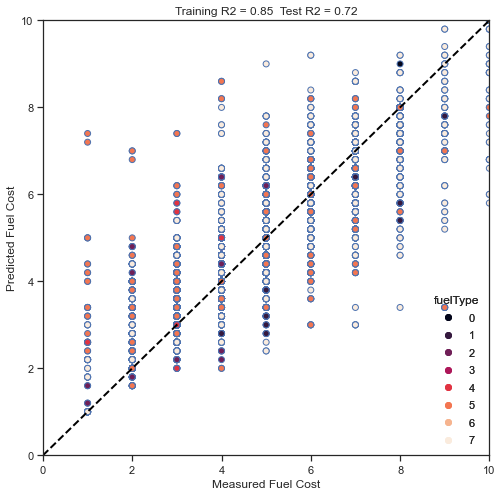

In [92]:
# Create a series of plots for predicted versus actual fuel cost
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 10, 0, 10])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 10],[0, 10], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## ExtraTree Regressor

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(random_state=42)
et.fit(X_train, Y_train)

ExtraTreesRegressor(random_state=42)

In [71]:
Y_pred = et.predict(X_test)  

# Compute test R2
et_R2 = et.score(X_test, Y_test)
et_R2


0.9842509620860418

In [72]:
et_tr = et.score(X_train, Y_train)
et_tr

1.0

Text(0.5, 1.0, 'Training R2 = 1.00  Test R2 = 0.98')

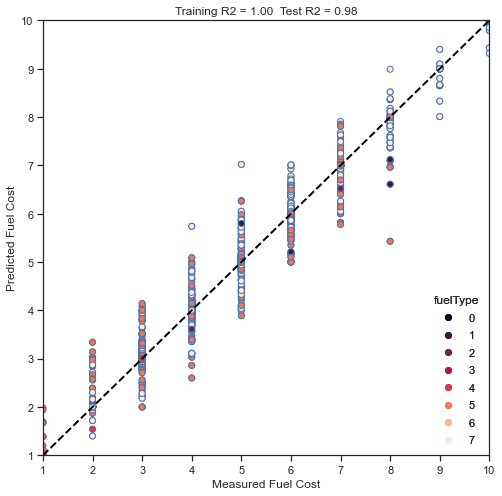

In [73]:
# Making prediction using test data
Y_pred = et.predict(X_test) 

# Compute test R2
test_R2 = et.score(X_test, Y_test)   

# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Also create a series of plots for predicted fuel cost versus actual fuel cost 
fig = plt.figure(figsize=(8, 8))
plt.axis([1, 10, 1, 10])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([1, 10],[1, 10], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(et_tr, et_R2))

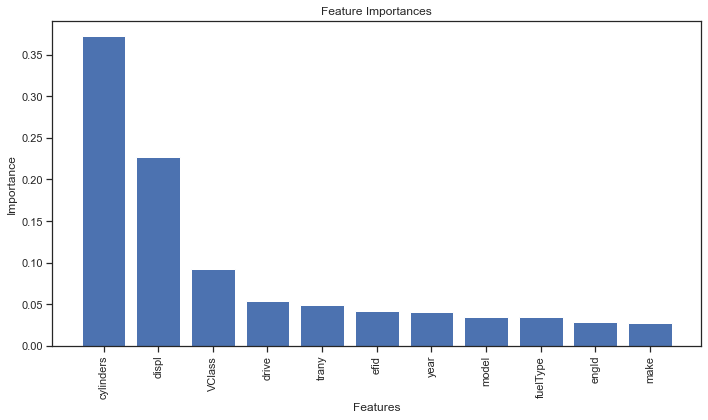

In [75]:
# Get feature importances
importances = et.feature_importances_

sorted_indices = importances.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()